In [1]:
from nixtlats import TimeGPT
import pandas as pd
import numpy as np
import os
from dotenv import load_dotenv, find_dotenv
from pathlib import Path
import hvplot.pandas
import yfinance as yf
import datetime

In [2]:
drop_cols = ['Volume', 'Dividends', 'Stock Splits', 'Capital Gains']

In [3]:
def get_history(ticker):
    tckr_name = yf.Ticker(ticker)
    tckr_df = tckr_name.history(period = '10y')
    tckr_df = tckr_df.drop(columns= drop_cols)
    tckr_df = tckr_df.dropna()
    tckr_df.index = tckr_df.index.date
    tckr_df.index.rename('Date', inplace = True)
    tckr_df.reset_index(inplace=True)
    return tckr_df

In [22]:
ticker = input(str('What Mutual Fund Would you like?'))

What Mutual Fund Would you like? VTSAX


In [23]:
get_history(ticker)

,Date,Open,High,Low,Close
0,2014-04-11,38.626186,38.626186,38.626186,38.626186
1,2014-04-14,38.904125,38.904125,38.904125,38.904125
2,2014-04-15,39.156822,39.156822,39.156822,39.156822
3,2014-04-16,39.586365,39.586365,39.586365,39.586365
4,2014-04-17,39.653759,39.653759,39.653759,39.653759
...,...,...,...,...,...
2511,2024-04-04,123.900002,123.900002,123.900002,123.900002
2512,2024-04-05,125.239998,125.239998,125.239998,125.239998
2513,2024-04-08,125.279999,125.279999,125.279999,125.279999
2514,2024-04-09,125.480003,125.480003,125.480003,125.480003


In [6]:
ticker_df = get_history(ticker)

In [7]:
find_dotenv()

'/Users/joshualee/Desktop/FinTech/Northwestern_Group_Project_3/Project_3/.env'

In [8]:
load_dotenv()

True

In [9]:
TimeGPT_Token = os.getenv("TIMEGPT_TOKEN")

In [10]:
# Instantiating TimeGPT Model
timegpt = TimeGPT(token = TimeGPT_Token)
# Validating TimeGPT token
timegpt.validate_token()

INFO:nixtlats.timegpt:Happy Forecasting! :), If you have questions or need support, please email ops@nixtla.io


True

## Read DataFrame and Plot

In [11]:
ticker_df.head()

,Date,Open,High,Low,Close
0,2014-04-11,38.626179,38.626179,38.626179,38.626179
1,2014-04-14,38.904121,38.904121,38.904121,38.904121
2,2014-04-15,39.156807,39.156807,39.156807,39.156807
3,2014-04-16,39.586349,39.586349,39.586349,39.586349
4,2014-04-17,39.653740,39.653740,39.653740,39.653740


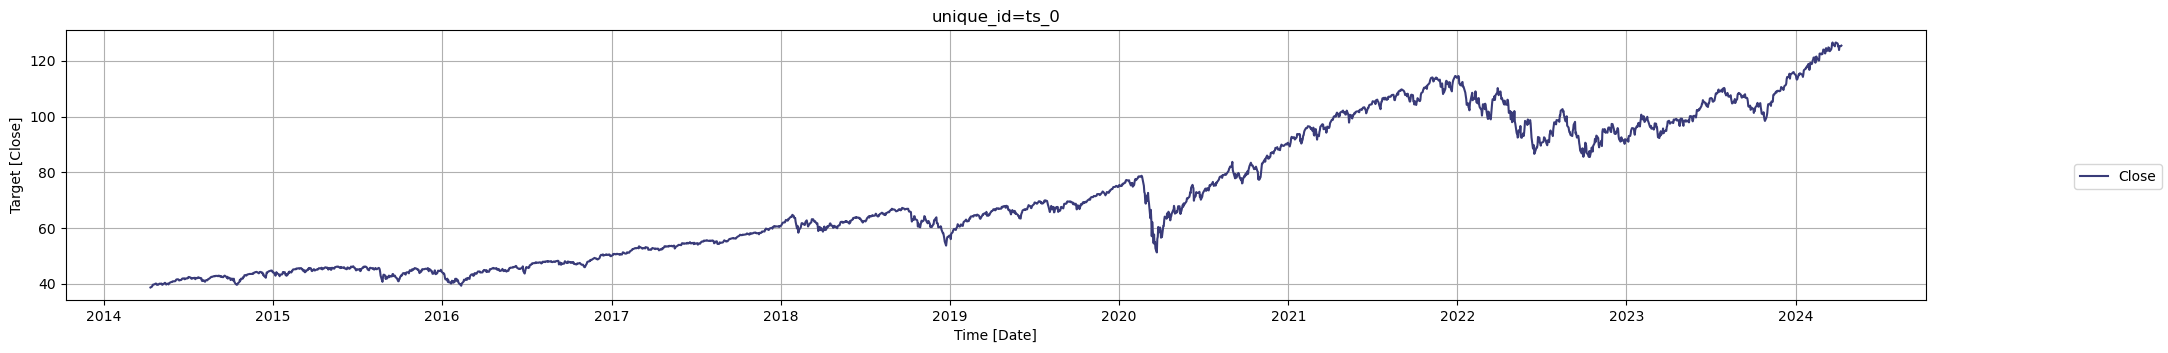

In [12]:
timegpt.plot(ticker_df, time_col='Date', target_col='Close')

## Orginal Forecast

In [13]:
timegpt_fcst_df = timegpt.forecast(df=ticker_df, h=24, freq='MS', time_col='Date', target_col='Close')
timegpt_fcst_df.head()

INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Calling Forecast Endpoint...


,Date,TimeGPT
0,2024-05-01,127.014114
1,2024-06-01,128.908600
2,2024-07-01,129.273376
3,2024-08-01,131.402649
4,2024-09-01,130.683258


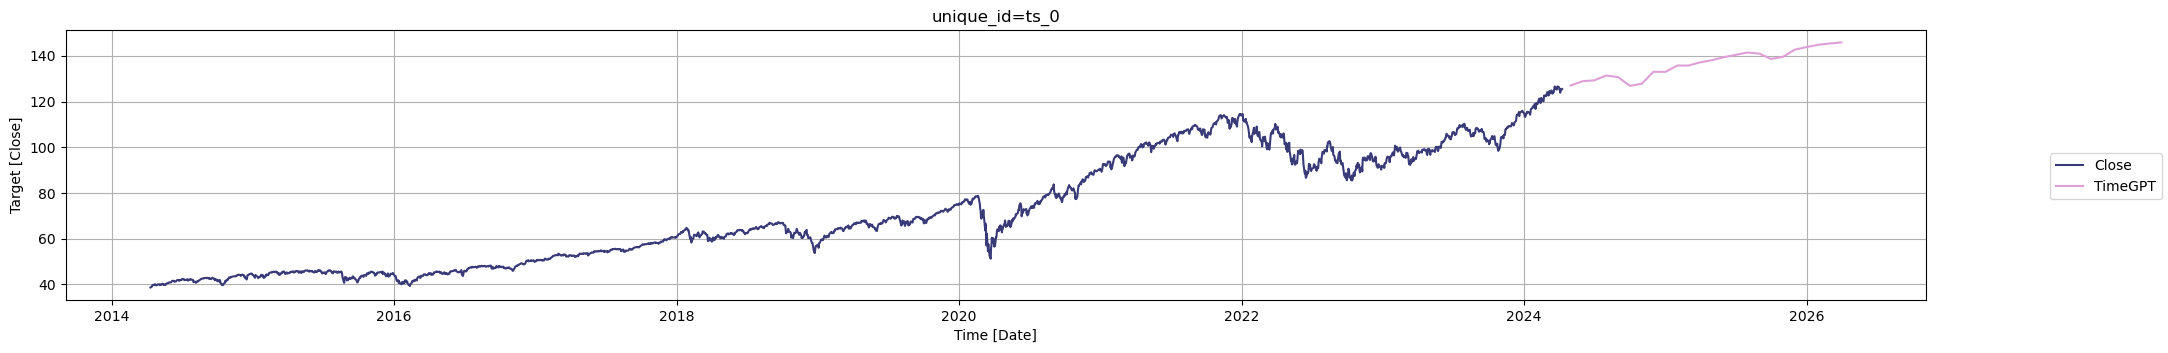

In [14]:
timegpt.plot(ticker_df, timegpt_fcst_df, time_col='Date', target_col='Close')


## FineTuned Forecast

In [15]:
timegpt_fcst_finetune_df = timegpt.forecast(
    df=ticker_df, freq='MS', h=24, fewshot_steps=10,
    time_col='Date', target_col='Close',
)

INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Calling Forecast Endpoint...


In [16]:
timegpt_fcst_finetune_df.head()

,Date,TimeGPT
0,2024-05-01,130.896347
1,2024-06-01,133.715576
2,2024-07-01,134.466782
3,2024-08-01,136.949478
4,2024-09-01,136.631546


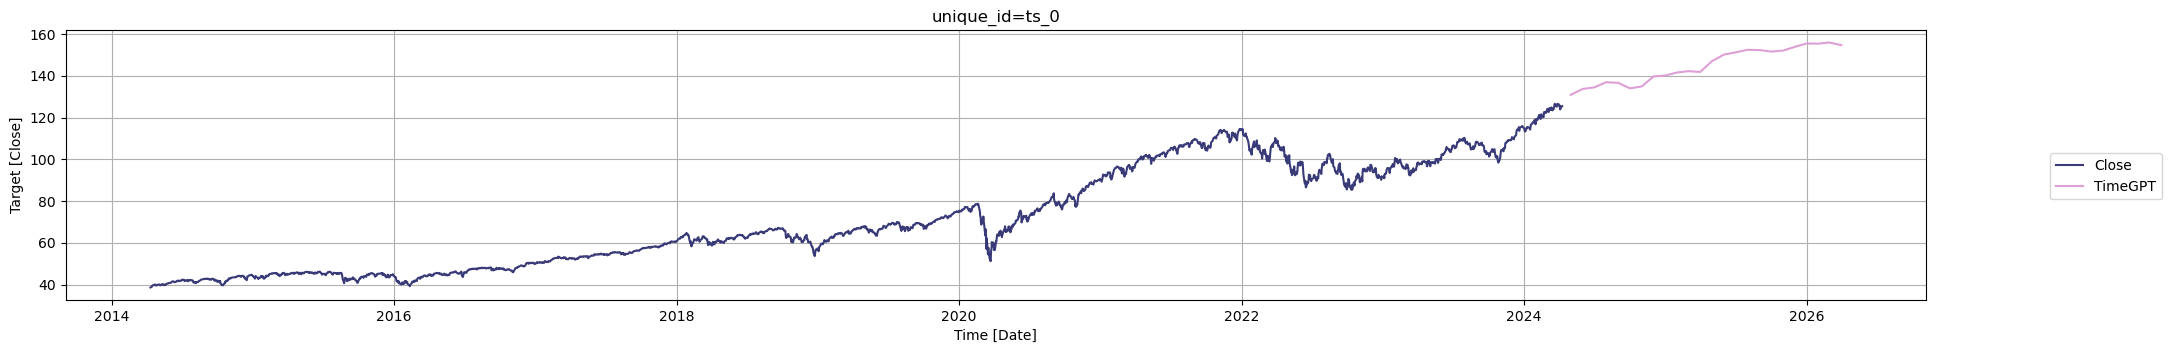

In [17]:
timegpt.plot(
    ticker_df, timegpt_fcst_finetune_df, 
    time_col='Date', target_col='Close',
)

## Quantile Forecast

In [18]:
quantiles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
timegpt_quantile_fcst_df = timegpt.forecast(
    df=ticker_df, h=24,
    freq='MS',
    quantiles=quantiles, 
    time_col='Date', target_col='Close',
)
timegpt_quantile_fcst_df.head()

INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Restricting input...
INFO:nixtlats.timegpt:Calling Forecast Endpoint...


,Date,TimeGPT,TimeGPT-q-10,TimeGPT-q-20,TimeGPT-q-30,TimeGPT-q-40,TimeGPT-q-50,TimeGPT-q-60,TimeGPT-q-70,TimeGPT-q-80,TimeGPT-q-90
0,2024-05-01,127.014114,121.178038,125.136440,125.605155,126.192980,127.014114,127.835249,128.423074,128.891789,132.850190
1,2024-06-01,128.908600,117.793661,125.686771,125.936897,126.750365,128.908600,131.066834,131.880303,132.130428,140.023538
2,2024-07-01,129.273376,117.050386,120.732051,126.668547,127.812904,129.273376,130.733849,131.878206,137.814702,141.496367
3,2024-08-01,131.402649,116.368555,120.588039,128.035778,130.359537,131.402649,132.445761,134.769520,142.217258,146.436743
4,2024-09-01,130.683258,111.794044,120.431857,125.489212,128.975182,130.683258,132.391335,135.877304,140.934660,149.572472


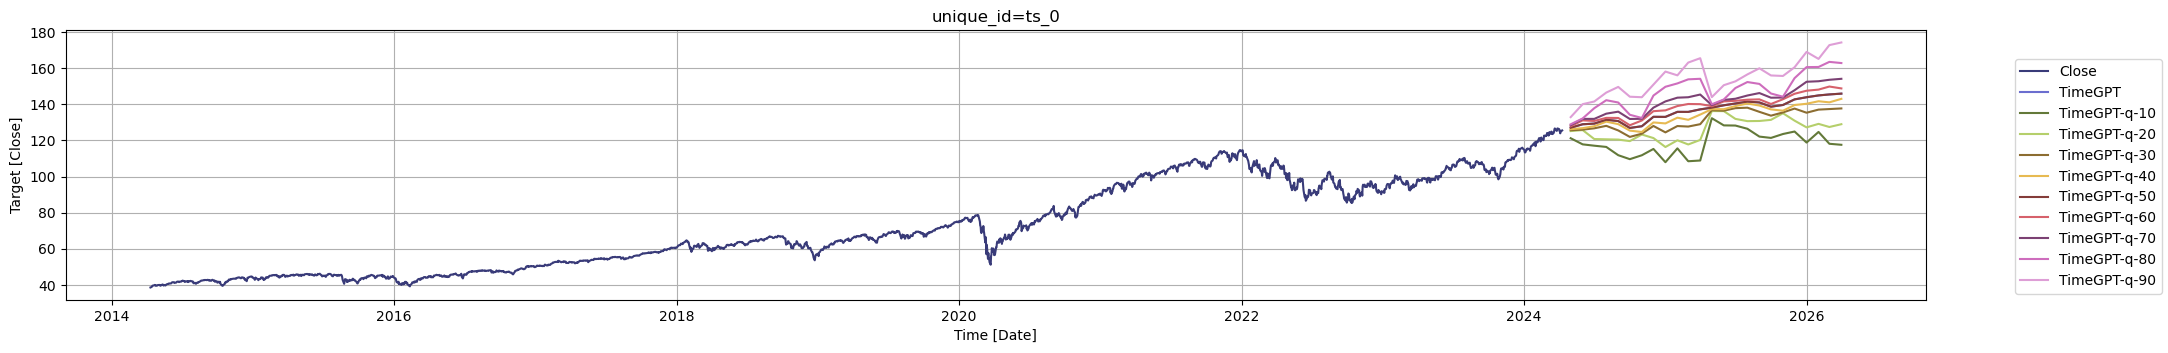

In [19]:
timegpt.plot(
    ticker_df, timegpt_quantile_fcst_df, 
    time_col='Date', target_col='Close',
)

## Long Horizon Forecast

In [20]:
timegpt_fcst_df_LH = timegpt.forecast(df=ticker_df, h=24, freq='MS', time_col='Date', target_col='Close', level = [90], model="long-horizon")
timegpt_fcst_df_LH.head()

INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Restricting input...
INFO:nixtlats.timegpt:Calling Forecast Endpoint...


,Date,TimeGPT,TimeGPT-lo-90,TimeGPT-hi-90
0,2024-05-01,126.577881,117.997885,135.157877
1,2024-06-01,127.651306,115.688432,139.614181
2,2024-07-01,128.240768,110.582659,145.898878
3,2024-08-01,129.338287,114.924502,143.752072
4,2024-09-01,128.693039,108.667667,148.718410


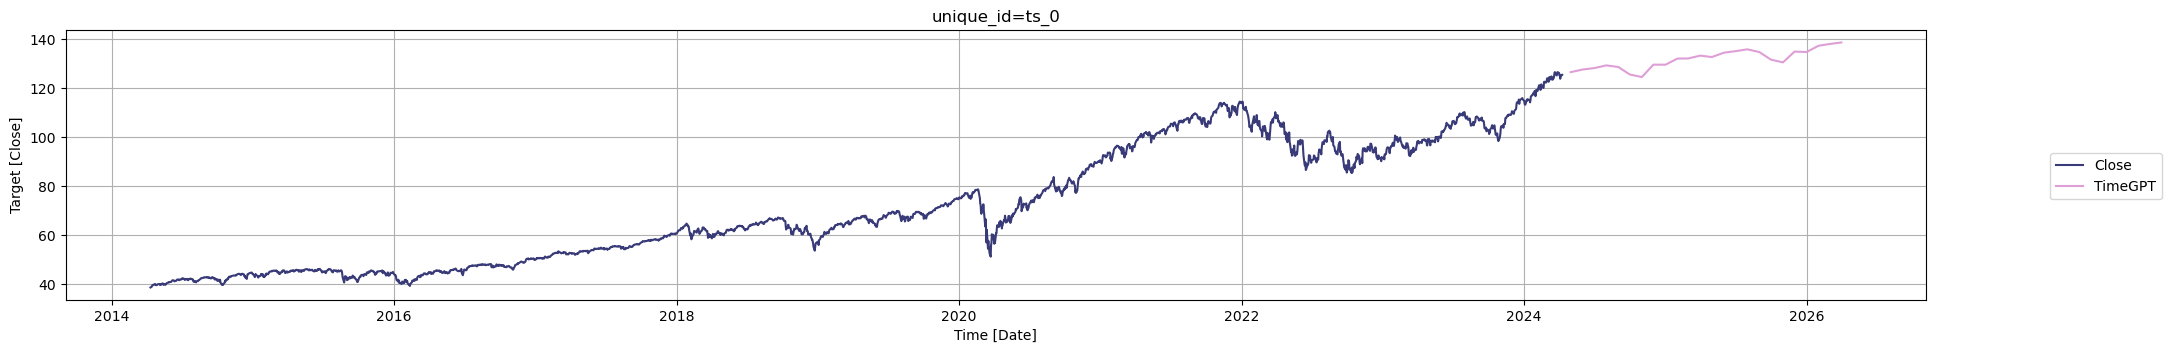

In [21]:
timegpt.plot(ticker_df, timegpt_fcst_df_LH, time_col='Date', target_col='Close')